# FACE DETECTOR WITH FACE-RECOGNITION

The goal of this notebook are to detect if in a one image there is a face of a person using the Python library of `face-recognition`. After return a true if there is a face in a image else false. If in the image there are more than one face return false

`face-recognition` is a Python open source library used to facial recognition throw deep neural networks to identify and recognizer faces in images and videos

## IMPORT LIBRARIES

In [1]:
import cv2
import face_recognition as fr
import matplotlib.pyplot as plt
import numpy as np

In [19]:
print(f"OpenCV version = {cv2.__version__}")
print(f"Face Recognition version = {fr.__version__}")
print(f"Numpy version = {np.__version__}")

OpenCV version = 4.7.0
Face Recognition version = 1.2.3
Numpy version = 1.24.3


## LOAD CONTROL AND TEST IMAGE

Now we are loading the images to control and test 

In [3]:
path_test_img_1 = '../data/Foto_Prueba_1.jpg'
path_test_img_2 = '../data/Foto_Prueba_1a.jpg'
path_test_img_3 = '../data/Foto_Prueba_1b.jpg'
path_test_img_4 = '../data/Foto_Prueba_1c.jpg'

#### First load the images

In [4]:
test_img_1 = cv2.imread(path_test_img_1)
test_img_2 = cv2.imread(path_test_img_2)
test_img_3 = cv2.imread(path_test_img_3)
test_img_4 = cv2.imread(path_test_img_4)

#### Show the  pictures

In [5]:
def show(images: list[np.ndarray], labels: list[str], show: bool=False):
    """This method show a list of images with it corresponding label
    used to the matplotlib library

    Args:
        images (list[np.ndarray]): _description_
        labels (list[str]): _description_
        show (bool, optional): _description_. Defaults to False.
    """
    # Create subplots
    fig, ax = plt.subplots(1, len(images), figsize=(10, 5))

    for index, img in enumerate(images):
        # Show each image in it subplot
        ax[index].imshow(img)
        ax[index].set_title(labels[index])

        # Adjust the position of subplots
        fig.tight_layout()

    # Show
    if show:
        plt.show()

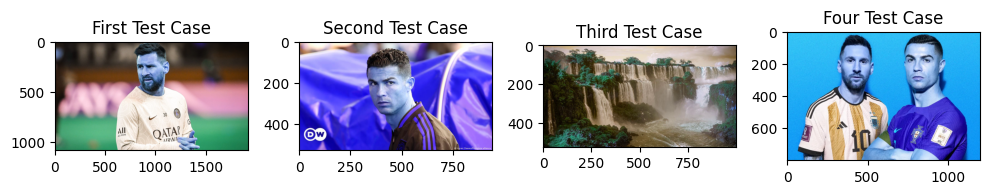

In [6]:
images = [test_img_1, test_img_2, test_img_3, test_img_4]
labels = ["First Test Case", "Second Test Case", "Third Test Case", "Four Test Case"]

show(images=images, labels=labels, show=True)

## PROCESS TO DETECT FACE IN A PICTURE

Now we can try to locate a face inside these images in the test dataset

In [12]:
# First we convert to RGB color with OpenCV
test_img_1 = cv2.cvtColor(test_img_1, cv2.COLOR_BGR2RGB)
test_img_2 = cv2.cvtColor(test_img_2, cv2.COLOR_BGR2RGB)
test_img_3 = cv2.cvtColor(test_img_3, cv2.COLOR_BGR2RGB)
test_img_4 = cv2.cvtColor(test_img_4, cv2.COLOR_BGR2RGB)

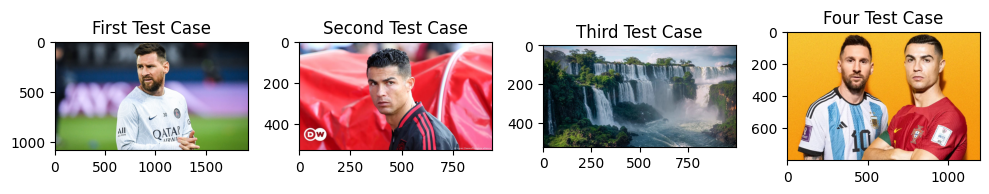

In [13]:
images = [test_img_1, test_img_2, test_img_3, test_img_4]
labels = ["First Test Case", "Second Test Case", "Third Test Case", "Four Test Case"]

show(images=images, labels=labels, show=True)

Locate = (171, 1033, 439, 765)


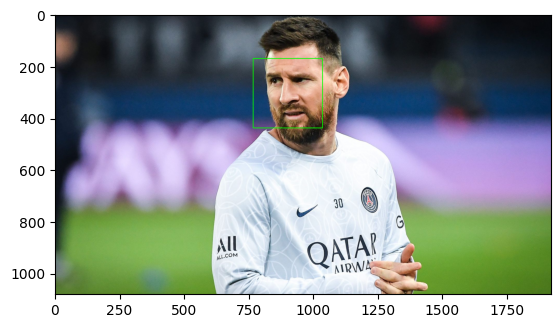

In [14]:
# Try to locate the face in a image
# First with the first test image
locate_test_img_1 = fr.face_locations(test_img_1)[0]
print(f"Locate = {locate_test_img_1}")

cv2.rectangle(img=test_img_1,
              pt1=(locate_test_img_1[3], locate_test_img_1[0]),
              pt2=(locate_test_img_1[1], locate_test_img_1[2]),
              color=(0, 255, 0),
              thickness=2)

cv2.imwrite('../data/test_result_1.jpg', test_img_1)

# Show the rectangle of a picture
plt.imshow(test_img_1)
plt.show()

In [15]:
def detect_faces(image: np.ndarray, output_dir: str, save: bool=False):
    """This function process and detect faces in a picture

    Args:
        image (np.ndarray): image to process
        output_dir (str): directory to save a file
        save (bool, optional): Flag to save image after processing. Defaults to False.

    Returns:
        _type_: _description_
    """
    response = {}
    # Locate the bbox of a face or faces in the image
    locate_faces = fr.face_locations(image)
    if len(locate_faces) != 0:
        # Draw with OpenCV the rectangle of the face
        for locate in locate_faces:
            cv2.rectangle(img=image,
                        pt1=(locate[3], locate[0]),
                        pt2=(locate[1], locate[2]),
                        color=(0, 255, 0),
                        thickness=2)
        response = {
            "detected_face": True,
            "bbox_faces": locate_faces,
            "number_of_detected_faces": len(locate_faces)
        }           
        if save:
            cv2.imwrite(output_dir, image)
        return response
    # Not detected any faces in the image
    response = {"detected_face": False}
    return response

Now we process the second and third test image

In [16]:
response_1 = detect_faces(test_img_2, '../data/test_result_2.jpg', save=True)
response_2 = detect_faces(test_img_3, '../data/test_result_3.jpg', save=True)
response_3 = detect_faces(test_img_4, '../data/test_result_4.jpg', save=True)

Show the results of the Test Case 2

##### TEST CASE 2 #####
VALID IMAGE


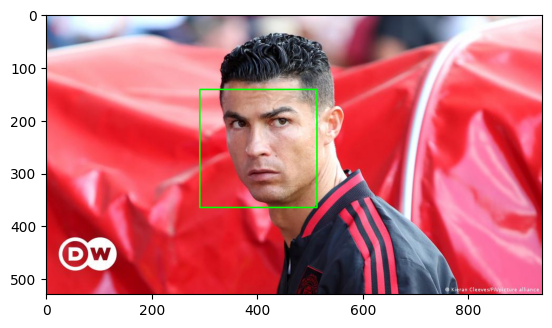

##### TEST CASE 3 #####
IMAGE NOT VALID
##### TEST CASE 4 #####
VALID IMAGE


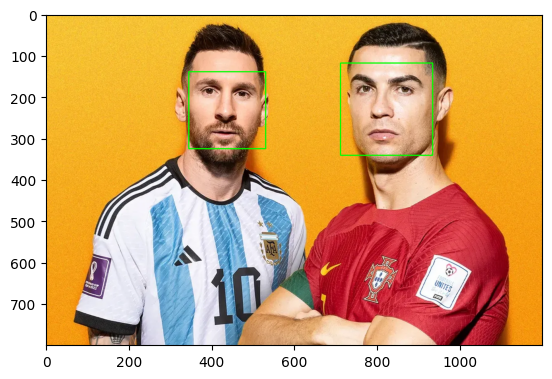

In [17]:
print("##### TEST CASE 2 #####")
if response_1["detected_face"] == True:
    print("VALID IMAGE")
    plt.imshow(test_img_2)
    plt.show()
else: 
    print("IMAGE NOT VALID")
    
print("##### TEST CASE 3 #####")
if response_2["detected_face"] == True:
    print("VALID IMAGE")
    plt.imshow(test_img_3)
    plt.show()
else: 
    print("IMAGE NOT VALID")
    
print("##### TEST CASE 4 #####")
if response_3["detected_face"] == True:
    print("VALID IMAGE")
    plt.imshow(test_img_4)
    plt.show()
else: 
    print("IMAGE NOT VALID")    

## SHOW ALL CASES WITH THESE BOUNDING BOX

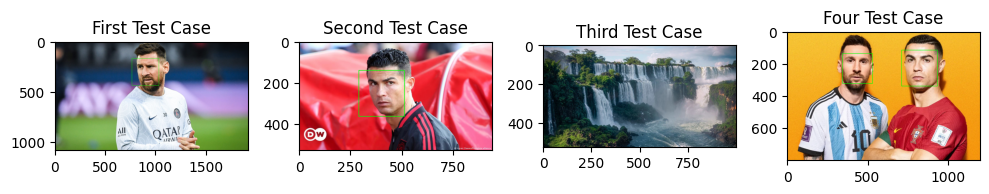

In [18]:
show(images=images, labels=labels, show=True)

## CONCLUSION

Thanks to a face-recognition library we can detected faces in a picture, this library has a great precision. 